<a href="https://colab.research.google.com/github/bala-codes/BENIGN-VS-MALIGNANT-URL-ML-CLASSIFIER/blob/master/(codes%20NN%20%2B%20CNN)/Part%201%20Fake%20News%20Classifier%20NN%20%26%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the libraries which are required.
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.utils.np_utils import to_categorical
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
li = [5, 7, 25]

f = list(filter(lambda x: x*2 , li))
f 

[7, 25]

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 12.4 GB  | Proc size: 2.6 GB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [ ]:
import pandas as pd
header = ['text','SECTION_CLEANED','label']
df = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/FAKE VS REAL NEWS - FINAL DATASETS/dfcleanedascsv.csv', usecols = header)
df = pd.DataFrame(df)

df.head()

,text,label,SECTION_CLEANED
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield shillman journalism fellow f...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,us secretary state john f kerry say monday sto...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— kaydee king kaydeeking november 9 2016 lesso...
4,It's primary day in New York and front-runners...,REAL,primary day new york frontrunners hillary clin...


In [ ]:
print(df.shape)
df.tail()

(6951, 3)


,text,label,SECTION_CLEANED
6946,HBO’s Real Time host Bill Maher – someone not ...,REAL,hbos real time host bill maher – someone often...
6947,New York (CNN) Hillary Clinton is visiting onl...,REAL,new york cnn hillary clinton visit two battleg...
6948,Hollywood loses yet another one of their deare...,REAL,hollywood lose yet another one dearest actress...
6949,Story highlights Trump was sitting in a chair ...,REAL,story highlight trump sit chair onstage feet a...
6950,"Donald Trump Jr., a son of the Republican pres...",REAL,donald trump jr son republican presidential no...


(6949, 3)
Class 0: 3685
Class 1: 3264
Proportion: 1.13 : 1


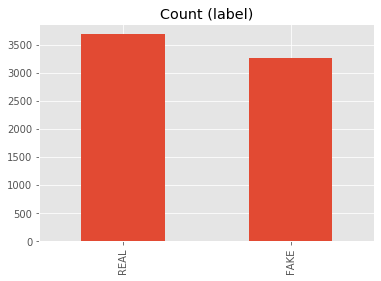

In [ ]:
df.dropna(inplace=True)
print(df.shape)
label_count = df.label.value_counts()
print('Class 0:', label_count[0])
print('Class 1:', label_count[1])
print('Proportion:', round(label_count[0] / label_count[1], 2), ': 1')

label_count.plot(kind='bar', title='Count (label)')

In [ ]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(df['SECTION_CLEANED'].values))))

Number of words: 
6834


In [ ]:
df['SECTION_CLEANED'] = df['SECTION_CLEANED'].astype(str)
df['label'] = df['label'].replace(to_replace = ['FAKE', 'REAL'], value = [0,1])
df.head()

,text,label,SECTION_CLEANED
0,"Daniel Greenfield, a Shillman Journalism Fello...",0,daniel greenfield shillman journalism fellow f...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,1,us secretary state john f kerry say monday sto...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,— kaydee king kaydeeking november 9 2016 lesso...
4,It's primary day in New York and front-runners...,1,primary day new york frontrunners hillary clin...


# If you get any stripes in the next figure, then you have some missing values in the dataset.

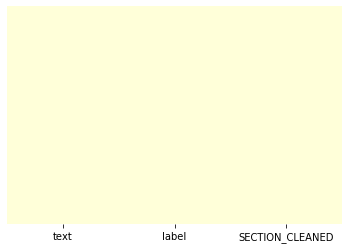

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [ ]:

from sklearn.model_selection import train_test_split

sentences = df['SECTION_CLEANED'].values
y = df['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
print(sentences_train.shape, sentences_test.shape)
print(y_train.shape, y_test.shape)

(5559,) (1390,)
(5559,) (1390,)


In [ ]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(sentences_train))))

Number of words: 
5483


In [ ]:
X = np.concatenate((sentences_train, sentences_test), axis=0)
len(X[0])

1031

Review length: 
Mean 2985.10 words (2692.350781)


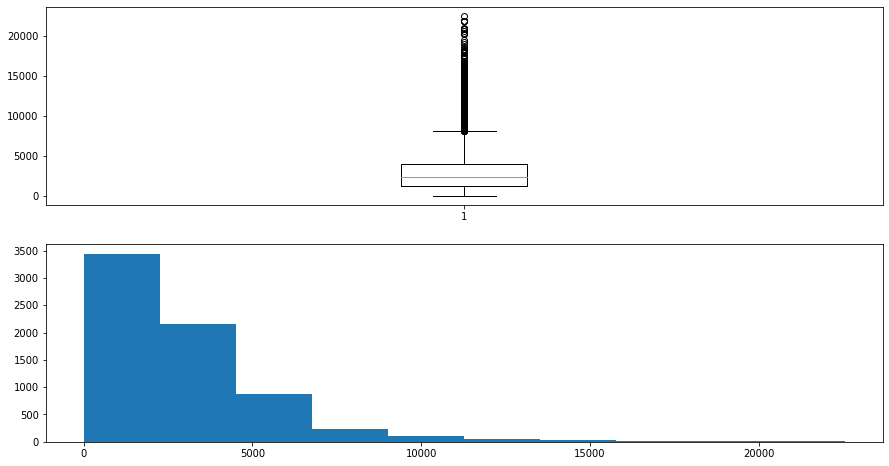

In [ ]:
# Summarize review length  {price:.2f} 

print("Review length: ")
result = list(map(len,X))
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

#print("Mean {} words {}".format(np.mean(result), np.std(result)))
# plot review length as a boxplot and histogram
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.boxplot(result)
plt.subplot(212)
plt.hist(result)
plt.show()

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(5559, 74261)
(5559,)
(1390, 74261)
(1390,)


In [ ]:
y_train

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
print(y_train[0:5])
y_train = keras.utils.to_categorical(y_train, num_classes=2, dtype='int32')
y_test = keras.utils.to_categorical(y_test, num_classes=2, dtype='int32')

y_train[0:5]

[0 1 0 1 0]


array([[1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0]], dtype=int32)

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

#A Simple Neural Network

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dropout, BatchNormalization, Dense
from keras import *

input_dim = X_train.shape[1]  # Number of features
print(input_dim)

model = Sequential()
model.add(layers.Dense(96, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.6))
model.add(layers.Dense(2, activation='softmax')) #initially  1 , sigmoid

76312


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 96)                7033536   
_________________________________________________________________
batch_normalization_3 (Batch (None, 96)                384       
_________________________________________________________________
dropout_3 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                3104      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                

In [ ]:
%%time
history = model.fit(X_train, y_train,epochs=11,verbose=1,validation_data=(X_test, y_test))

Train on 5211 samples, validate on 1738 samples
Epoch 1/11
5211/5211 [==============================] - 12s 2ms/step - loss: 0.4892 - acc: 0.7883 - val_loss: 0.2775 - val_acc: 0.8964
Epoch 2/11
5211/5211 [==============================] - 6s 1ms/step - loss: 0.2343 - acc: 0.9156 - val_loss: 0.2673 - val_acc: 0.9005
Epoch 3/11
5211/5211 [==============================] - 6s 1ms/step - loss: 0.1536 - acc: 0.9461 - val_loss: 0.2821 - val_acc: 0.8976
Epoch 4/11
5211/5211 [==============================] - 6s 1ms/step - loss: 0.1023 - acc: 0.9666 - val_loss: 0.3154 - val_acc: 0.8947
Epoch 5/11
5211/5211 [==============================] - 6s 1ms/step - loss: 0.0850 - acc: 0.9752 - val_loss: 0.3500 - val_acc: 0.8987
Epoch 6/11
5211/5211 [==============================] - 6s 1ms/step - loss: 0.0927 - acc: 0.9716 - val_loss: 0.3557 - val_acc: 0.8999
Epoch 7/11
5211/5211 [==============================] - 6s 1ms/step - loss: 0.0844 - acc: 0.9733 - val_loss: 0.3517 - val_acc: 0.8953
Epoch 8/11
52

In [ ]:
from sklearn import metrics

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

print("CONFUSION MATRIX")
pred = model.predict(X_test)
cm = metrics.confusion_matrix(np.argmax(y_test, axis= 1),np.argmax(pred, axis = 1), labels=[0,1]) # 'FAKE','REAL'
print(cm)

Training Accuracy: 0.9871
Testing Accuracy:  0.8953
CONFUSION MATRIX
[[757  70]
 [112 799]]


X range(1, 12)


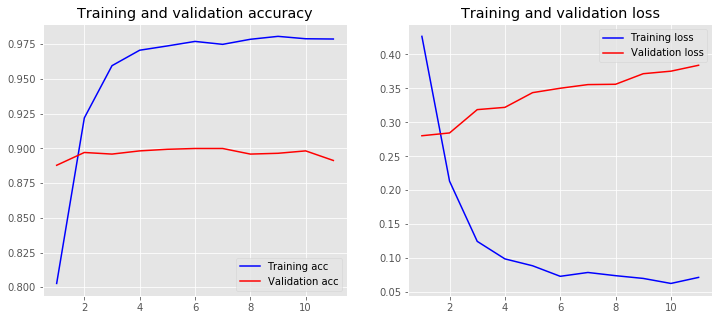

In [ ]:
plot_history(history)

In [ ]:
# Save the weights
model.save_weights('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/fakenews_NN_model_weights.h5')

# Save the model architecture
with open('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/fakenews_NN_model_architecture.json', 'w') as f:
    f.write(model.to_json())

# A Convolutional Neural Network

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
with open('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/CNN_tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 1000 # 800

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
print(X_train[200])

[1211   18 2758  186  121 1211   18 2758  186  121   30 1009 1211   18
 1336 2758  186  121  257   15 1197 4982  451 2031 1307 2092 1717  923
   36  170 3860   85 1211 1083  361   35  739  257 3816  925  765   18
  328 2758   34 2388   30   79  797  585  142  215   25    5  186  351
 4834  391  117 4278 1375  396  348  764  923  924  678  505  579  319
  500   73 3561  294 2240  270  595   28  289  186  797  377 3860 1247
 4344 1395  439  213  687    1   34 2388  989 1018   30  121  223  216
  969 4293  772  714 1280   15  595   93  451 2031 2554  793  300  797
    5    1  597   40  619    5 1855  171  184 2092 1505 3294    5  141
  270   30   79 1717  122    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Conv1D, Dropout, BatchNormalization
from keras.layers import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import *
from keras.callbacks import *

embedding_dim = 500

model = Sequential()
model.add(layers.Embedding(input_dim = vocab_size , output_dim = embedding_dim ,input_length = maxlen))
model.add(layers.Conv1D(filters=32, kernel_size=4, padding = 'valid' ,activation= 'relu' ))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=64, kernel_size=5, padding = 'valid' ,activation= 'relu' ))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation= 'relu' ))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(2, activation= 'softmax' ))
# Important Note - About the next line, needs to be taken care of.
#model.load_weights("/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/reloader_weights.h5")
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1000, 500)         41583000  
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 997, 32)           64032     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 498, 32)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 494, 64)           10304     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 247, 64)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 15808)             0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 15808)            

In [ ]:
%%time
#red_lr= ReduceLROnPlateau(monitor='val_loss', patience = 3 , verbose = 2 , factor = 0.5 , min_delta = 0.01 )
check=ModelCheckpoint(filepath=r'/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/FAKENEWS_CNN_MODEL.h5', verbose=1 , monitor='val_acc',save_best_only=True, mode='max')

history = model.fit(X_train, y_train , epochs = 20 , verbose = 1 , callbacks = [check], validation_data=(X_test, y_test))

Train on 5559 samples, validate on 1390 samples
Epoch 1/20
5559/5559 [==============================] - 17s 3ms/step - loss: 0.0850 - acc: 0.9714 - val_loss: 0.4580 - val_acc: 0.8806

Epoch 00001: val_acc improved from -inf to 0.88058, saving model to /content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/FAKENEWS_CNN_MODEL.h5
Epoch 2/20
5559/5559 [==============================] - 15s 3ms/step - loss: 0.0600 - acc: 0.9741 - val_loss: 0.5303 - val_acc: 0.8597

Epoch 00002: val_acc did not improve from 0.88058
Epoch 3/20
5559/5559 [==============================] - 15s 3ms/step - loss: 0.0589 - acc: 0.9755 - val_loss: 0.4570 - val_acc: 0.8755

Epoch 00003: val_acc did not improve from 0.88058
Epoch 4/20
5559/5559 [==============================] - 15s 3ms/step - loss: 0.0526 - acc: 0.9777 - val_loss: 0.6280 - val_acc: 0.8532

Epoch 00004: val_acc did not improve from 0

In [ ]:
model.save_weights("/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/reloader_weights.h5")
print("Saved model to disk")

Training Accuracy: 0.9849
Testing Accuracy:  0.8763
CONFUSION MATRIX
[[585  70]
 [102 633]]
              precision    recall  f1-score   support

        FAKE       0.85      0.89      0.87       655
        REAL       0.90      0.86      0.88       735

    accuracy                           0.88      1390
   macro avg       0.88      0.88      0.88      1390
weighted avg       0.88      0.88      0.88      1390



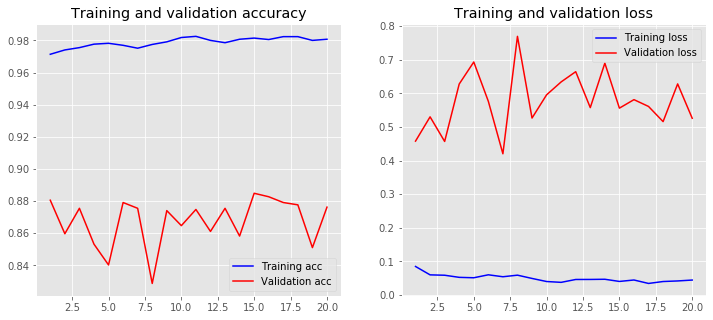

In [ ]:
from sklearn import metrics
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

print("CONFUSION MATRIX")
pred = model.predict(X_test)
cm = metrics.confusion_matrix(np.argmax(y_test, axis= 1),np.argmax(pred, axis = 1), labels=[0,1]) # 'FAKE','REAL'
print(cm)

#CONFUSION MATRIX
#[578  77]
#[ 72 663]

print(classification_report(y_test.argmax(axis=1),pred.argmax(axis=1), target_names=['FAKE','REAL']))
plot_history(history)

# CONCATTED CONVOLUTIONAL MULTI MODEL ARCHITECTURE

In [ ]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Conv1D, Dropout, BatchNormalization
from keras.layers import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils.vis_utils import plot_model
from keras.layers.merge import concatenate
from keras import *
from keras.callbacks import *

def model_arc1(length, vocab_size):
  embedding_dim = 500

  # channel 1

  inputs1 = Input(shape=(length,))
  embedding1 = Embedding(input_dim = vocab_size, output_dim = embedding_dim)(inputs1)
  conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(embedding1)
  pool1 = MaxPooling1D(pool_size=2)(conv1)
  flat1 = Flatten()(pool1)

  # channel 2

  inputs2 = Input(shape=(length,))
  embedding2 = Embedding(input_dim = vocab_size, output_dim = embedding_dim)(inputs2)
  conv2 = Conv1D(filters=64, kernel_size=4, activation='relu')(embedding2)
  pool2 = MaxPooling1D(pool_size=2)(conv2)
  flat2 = Flatten()(pool2)

  # channel 3

  inputs3 = Input(shape=(length,))
  embedding3 = Embedding(input_dim = vocab_size, output_dim = embedding_dim)(inputs3)
  conv3 = Conv1D(filters=256, kernel_size=5, activation='relu')(embedding3)
  pool3 = MaxPooling1D(pool_size=2)(conv3)
  flat3 = Flatten()(pool3)

# merge
  merged = concatenate([flat1, flat2, flat3])

# interpretation
  bn1 = BatchNormalization()(merged)

  dense1 = Dense(512, activation='relu')(bn1)
  bn1 = BatchNormalization()(dense1)
  drop4 = Dropout(0.5)(bn1)
  outputs = Dense(2, activation='softmax')(drop4)
  model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)

# compile
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #plot_model(model, show_shapes=True, to_file='/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/model_concatted_convolution.png')

  return model

def model_arc2(length, vocab_size):
  embedding_dim = 500

  # channel 1
  inputs1 = Input(shape=(length,))
  embedding1 = Embedding(input_dim = vocab_size, output_dim = embedding_dim)(inputs1)
  conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
  drop1 = Dropout(0.5)(conv1)
  pool1 = MaxPooling1D(pool_size=2)(drop1)
  flat1 = Flatten()(pool1)
  # channel 2
  inputs2 = Input(shape=(length,))
  embedding2 = Embedding(input_dim = vocab_size, output_dim = embedding_dim)(inputs2)
  conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
  drop2 = Dropout(0.5)(conv2)
  pool2 = MaxPooling1D(pool_size=2)(drop2)
  flat2 = Flatten()(pool2)
  # channel 3
  inputs3 = Input(shape=(length,))
  embedding3 = Embedding(input_dim = vocab_size, output_dim = embedding_dim)(inputs3)
  conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
  drop3 = Dropout(0.5)(conv3)
  pool3 = MaxPooling1D(pool_size=2)(drop3)
  flat3 = Flatten()(pool3)
  # merge
  merged = concatenate([flat1, flat2, flat3])
  # interpretation
  dense1 = Dense(10, activation='relu')(merged)
  outputs = Dense(2, activation='softmax')(dense1)
  model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
  # compile
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # summarize
  #model.summary()
  #plot_model(model, show_shapes=True, to_file='model.png')
  return model


# Initial Filters are 32 , 32 , 32 : "Acc " - 98.7 & 89 %

'''

In [1]:
%%time

model_concat = model_arc1(maxlen, vocab_size)

print()
red_lr= ReduceLROnPlateau(monitor='val_loss', patience = 5 , verbose = 2 , factor = 0.5 , min_delta = 0.01 )
check=ModelCheckpoint(filepath=r'/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/FAKENEWS_CNN_CONCAT_MODELx2.h5', verbose=1 , monitor='val_acc',save_best_only=True, mode='max')

history = model_concat.fit([X_train,X_train,X_train], y_train , epochs = 10 , verbose = 2 , callbacks = [red_lr, check], validation_data=([X_test,X_test,X_test], y_test), batch_size= 12)

model_concat.summary

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


"\nmodel_concat = model_arc1(maxlen, vocab_size)\n\nprint()\nred_lr= ReduceLROnPlateau(monitor='val_loss', patience = 5 , verbose = 2 , factor = 0.5 , min_delta = 0.01 )\ncheck=ModelCheckpoint(filepath=r'/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/FAKENEWS_CNN_CONCAT_MODELx2.h5', verbose=1 , monitor='val_acc',save_best_only=True, mode='max')\n\nhistory = model_concat.fit([X_train,X_train,X_train], y_train , epochs = 10 , verbose = 2 , callbacks = [red_lr, check], validation_data=([X_test,X_test,X_test], y_test), batch_size= 12)\n\nmodel_concat.summary"

In [ ]:
loss, accuracy = model_concat.evaluate([X_train,X_train,X_train], y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_concat.evaluate([X_test,X_test,X_test], y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
from sklearn import metrics

print("CONFUSION MATRIX")
pred = model_concat.predict([X_test,X_test,X_test])
cm = metrics.confusion_matrix(np.argmax(y_test, axis= 1),np.argmax(pred, axis = 1), labels=[0,1]) # 'FAKE','REAL'
print(cm)

#CONFUSION MATRIX
#[777  50]
#[152 759]

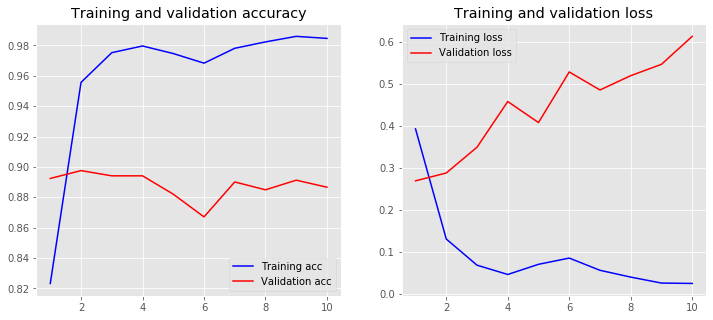

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()